In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

# import from data_utils
from data_utils import load_data, column_summary

In [4]:
# Load data 
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\train.csv' 
df = load_data(file_path) 

In [5]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# Call column_summary function
summary_df = column_summary(df) 
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Store,int64,0,1017209,1115
1,DayOfWeek,int64,0,1017209,7
2,Date,object,0,1017209,942
3,Sales,int64,0,1017209,21734
4,Customers,int64,0,1017209,4086
5,Open,int64,0,1017209,2
6,Promo,int64,0,1017209,2
7,StateHoliday,object,0,1017209,5
8,SchoolHoliday,int64,0,1017209,2


In [8]:
# Define a dictionary to map old column names to new column names
new_column_names = {
    'Store': 'store_id',
    'DayOfWeek': 'day_of_week',
    'Date': 'date',
    'Sales': 'sales',
    'Customers': 'customers',
    'Open': 'store_open', 
    'Promo': 'promotion',
    'StateHoliday': 'state_holiday',
    'SchoolHoliday': 'school_holiday'
}

# Rename the columns using the dictionary
df.rename(columns=new_column_names, inplace=True)


In [9]:
df.head()

,store_id,day_of_week,date,sales,customers,store_open,promotion,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


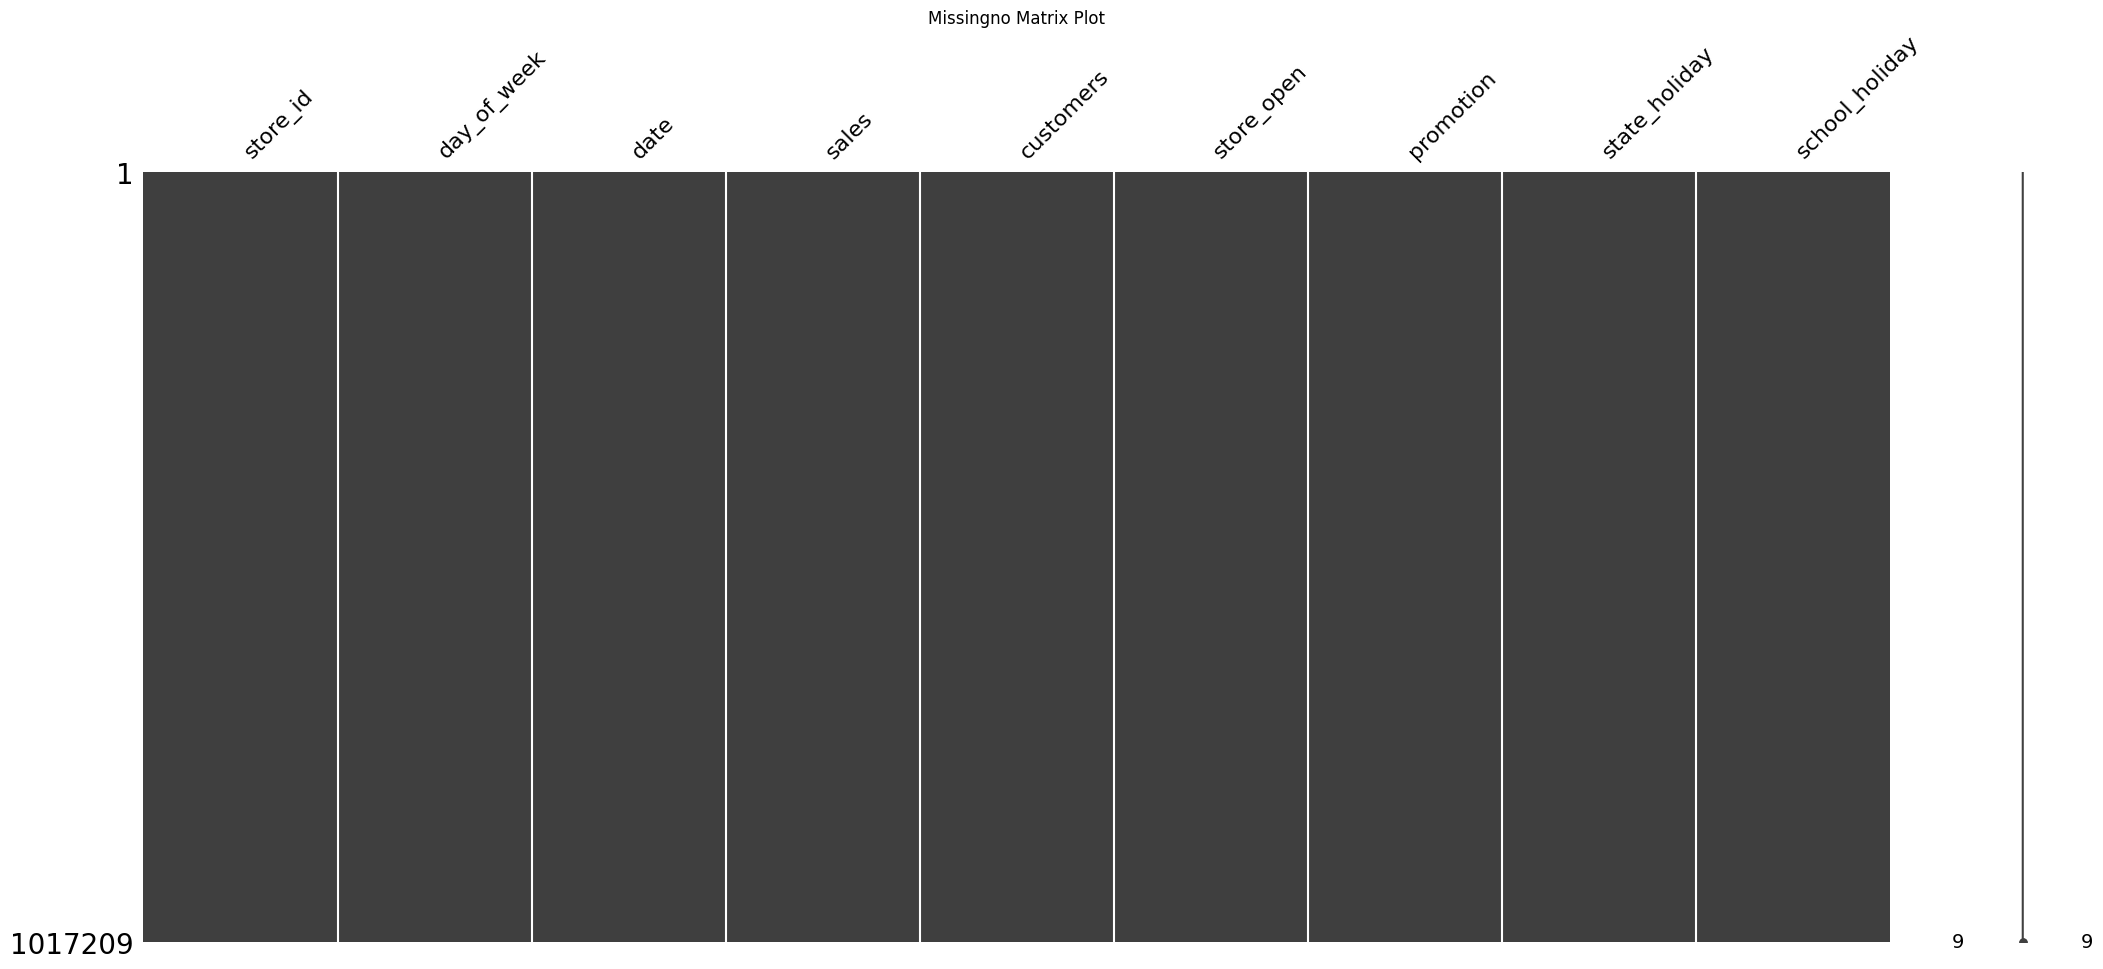

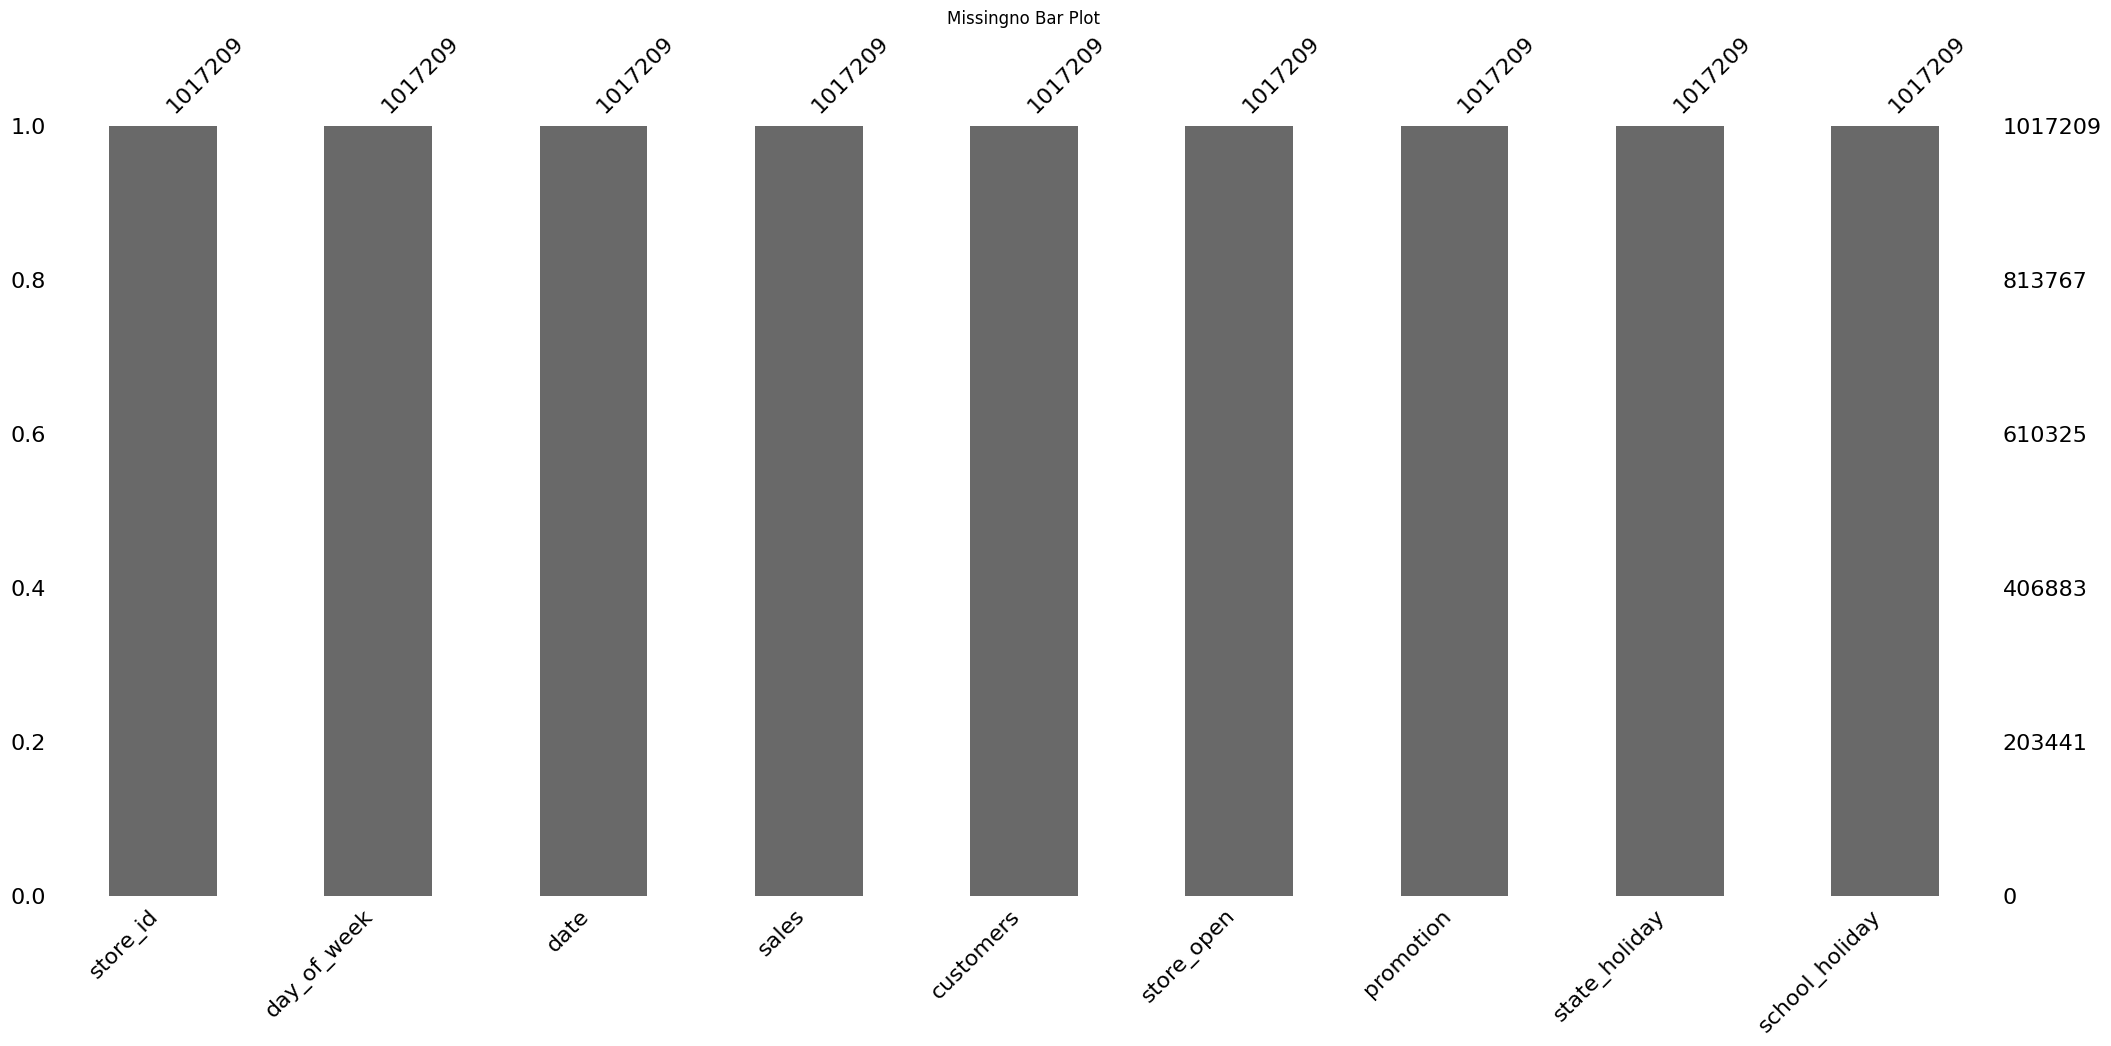

In [10]:
from data_utils import plot_missingno_matrix_bar
plot_missingno_matrix_bar(df)

In [11]:
from data_utils import duplicates_info
duplicates = duplicates_info(df)
display((duplicates))

   store_id  day_of_week        date  sales  customers  store_open  promotion state_holiday  school_holiday
0         1            5  2015-07-31   5263        555           1          1             0               1
1         2            5  2015-07-31   6064        625           1          1             0               1
2         3            5  2015-07-31   8314        821           1          1             0               1
3         4            5  2015-07-31  13995       1498           1          1             0               1
4         5            5  2015-07-31   4822        559           1          1             0               1
           store_id   day_of_week         sales     customers    store_open     promotion  school_holiday
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06    1.017209e+06
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01    1.786467e-01
std    3.219087e+02  1.997391e+00 

None

## Test data distribution analysis

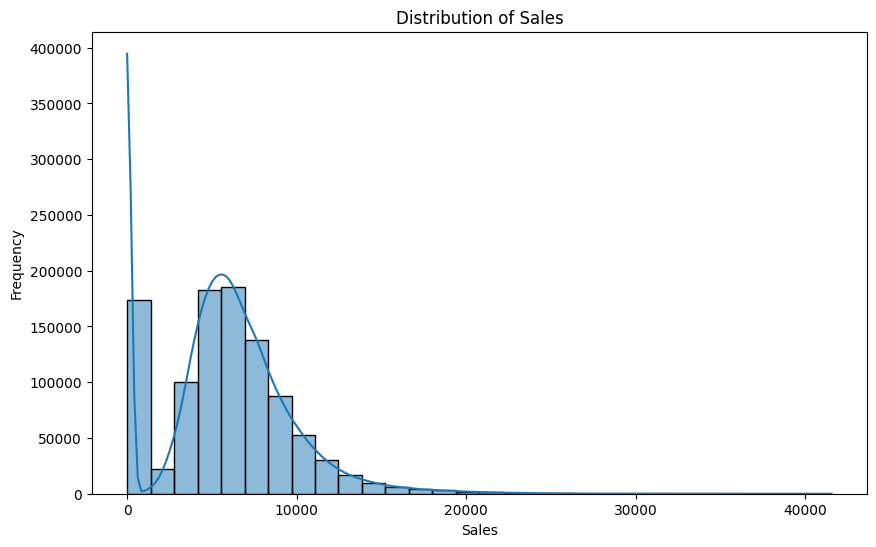

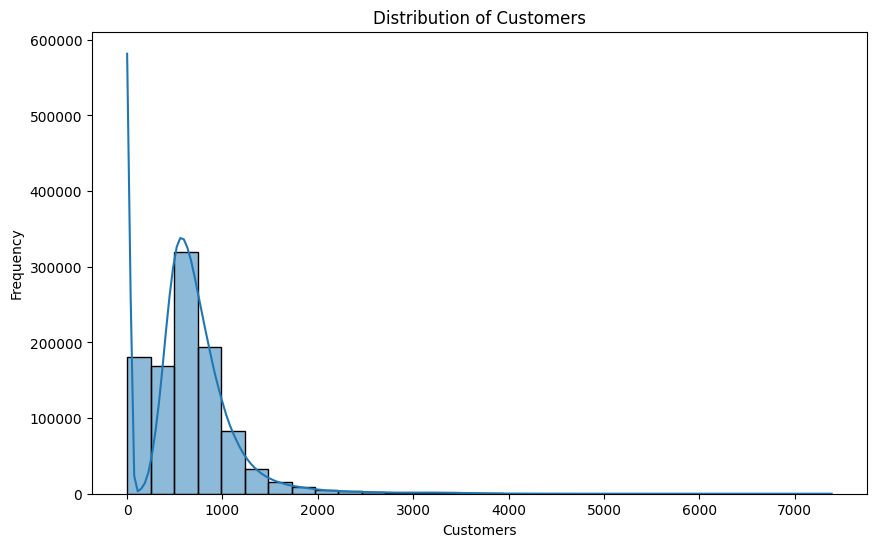

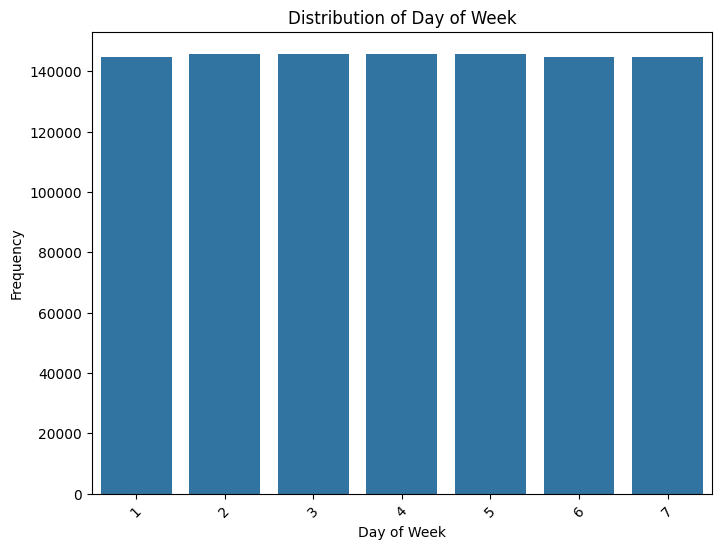

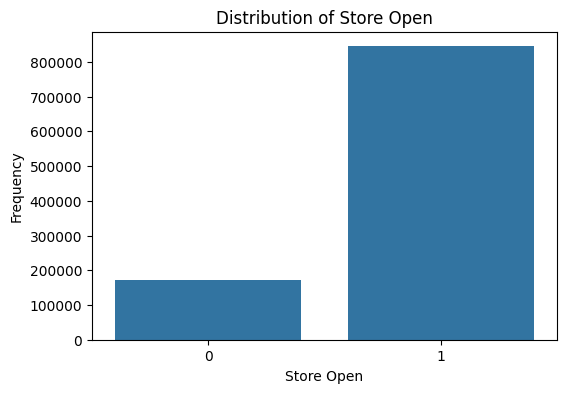

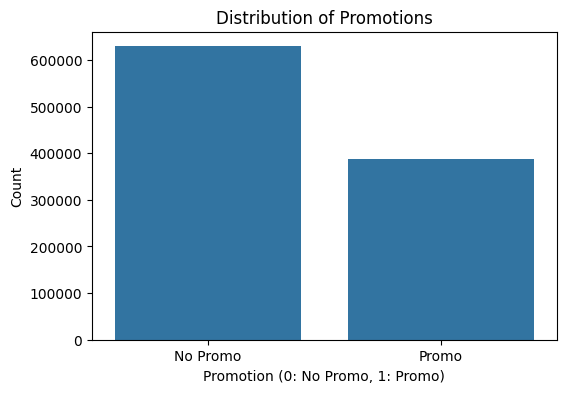

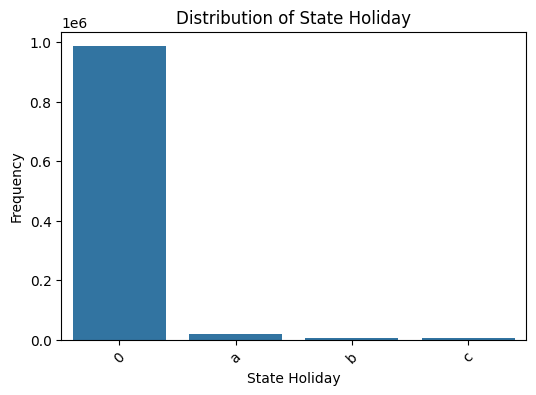

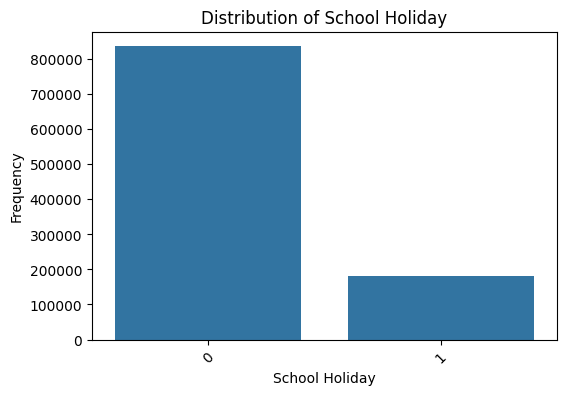

In [12]:
from data_utils import plot_distributions_and_countplots
plot_distributions_and_countplots(df)

## Relationshiph between Sales and Customer

In [13]:
# calling store data
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\store.csv' 
store_df = load_data(file_path) 

In [14]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


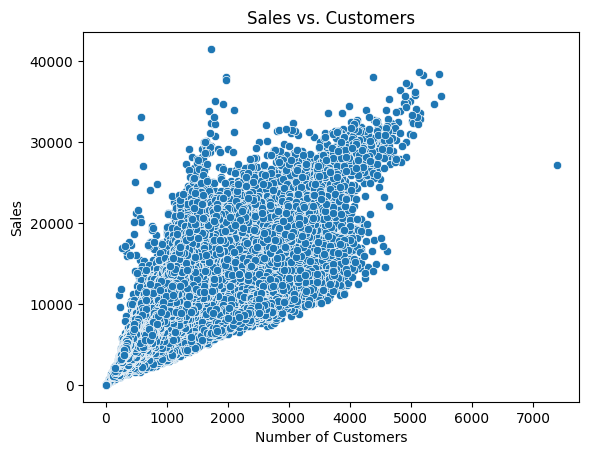

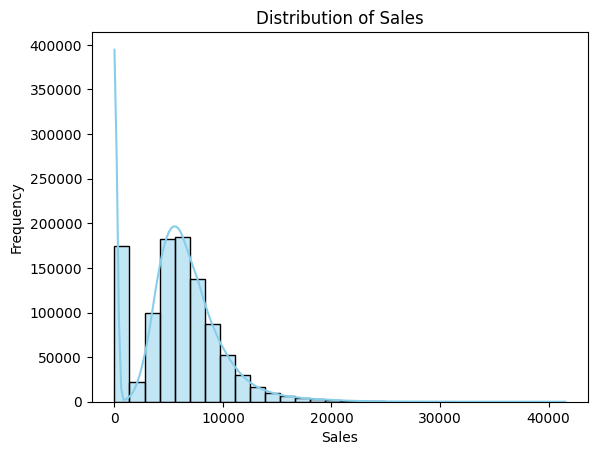

In [19]:
from data_utils import preprocess_and_visualize_store_data
preprocess_and_visualize_store_data(store_df, df)

## Relationship between Promotion and Sales

In [22]:
# Merge store data with training data
store_train_df = pd.merge(store_df, df, on='store_id', how='left')

Average Sales during Promotion: 7991.15
Average Sales without Promotion: 4406.05


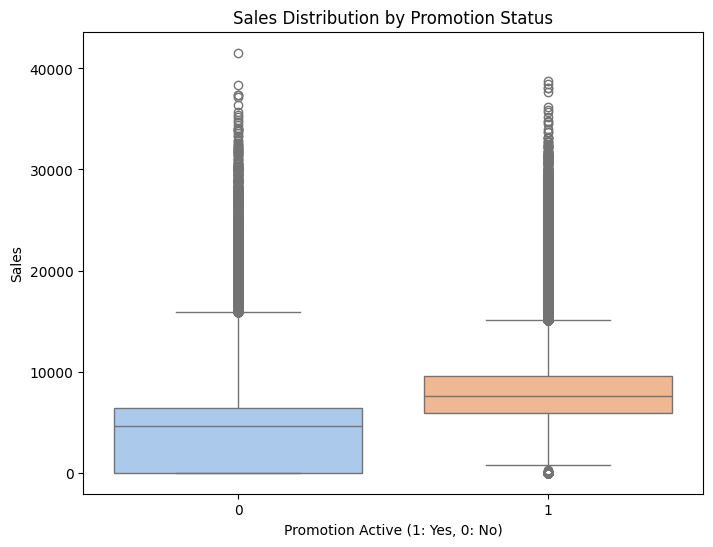

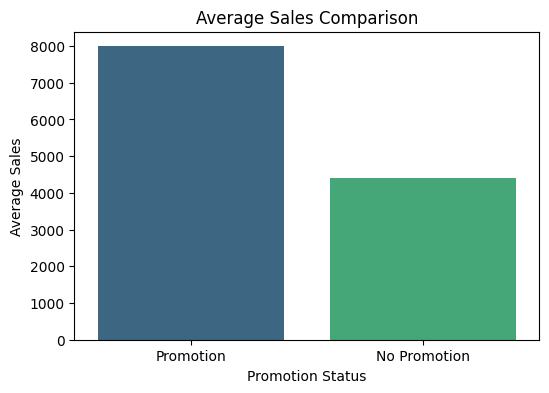

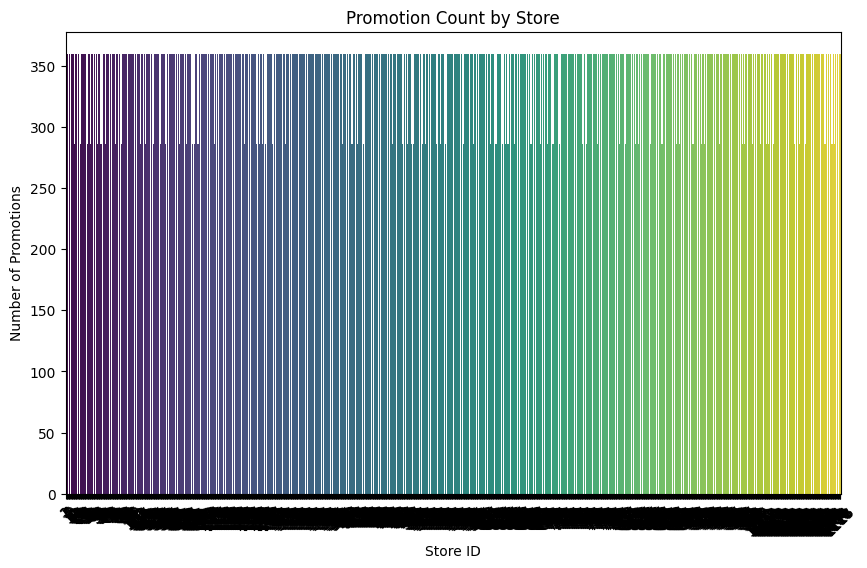

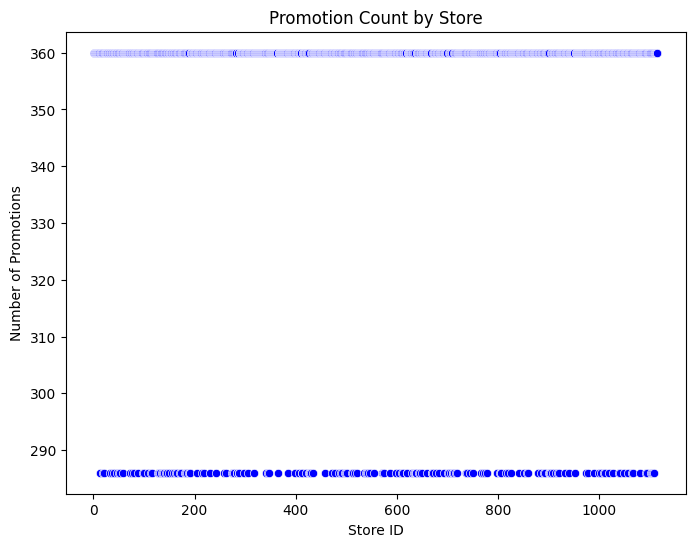

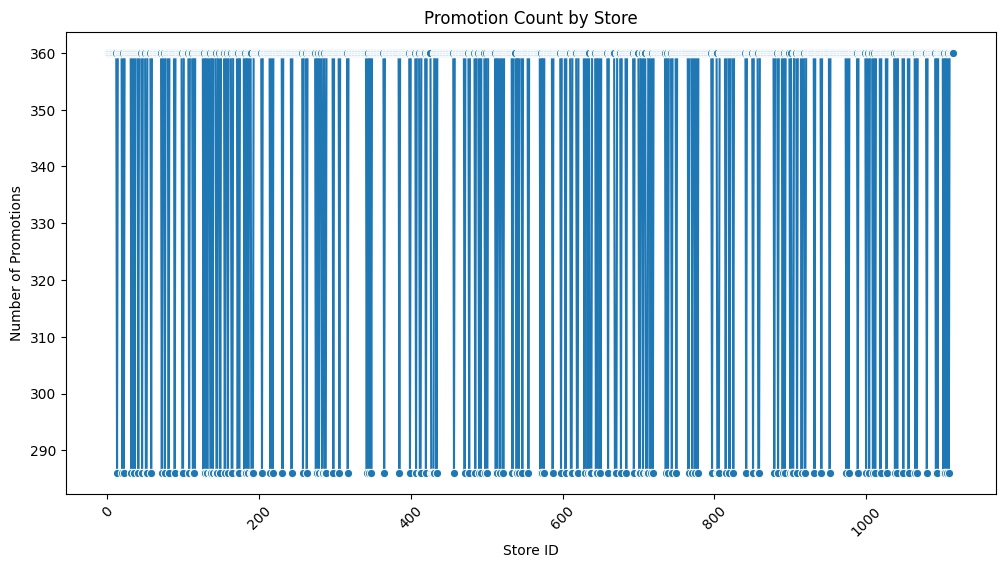

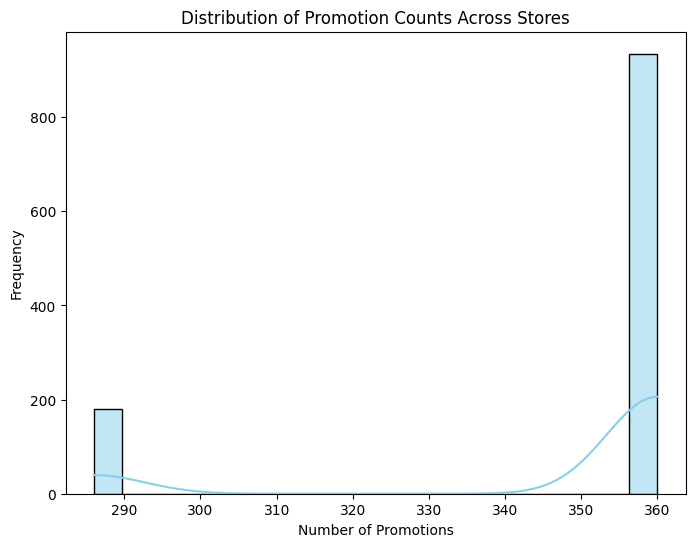

In [23]:
from data_utils import analyze_promotions
analyze_promotions(store_train_df)

## Weekdays and Weekends

Average Sales on Weekdays: 6866.81
Average Sales on Weekends: 3025.87


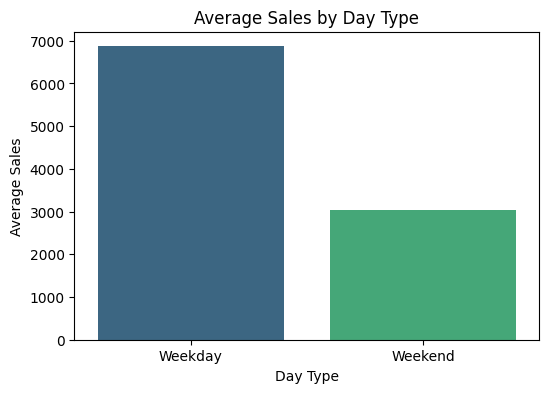

In [24]:
from data_utils import analyze_sales_by_daytype
analyze_sales_by_daytype(store_train_df)

## Assortment type and sales

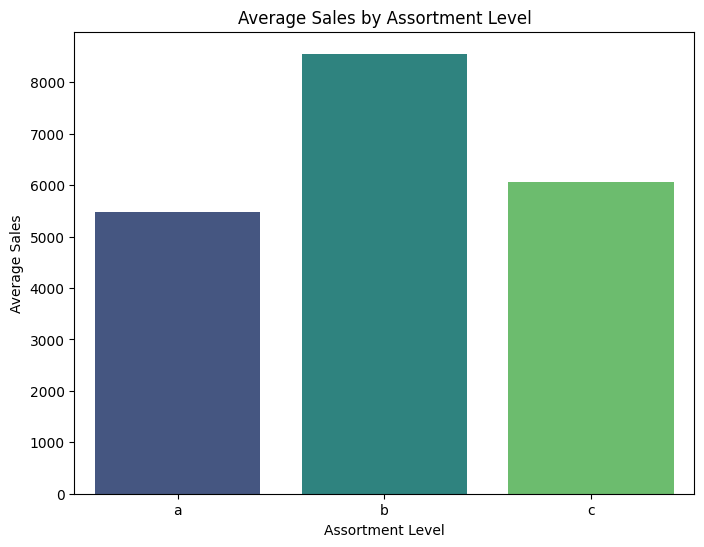

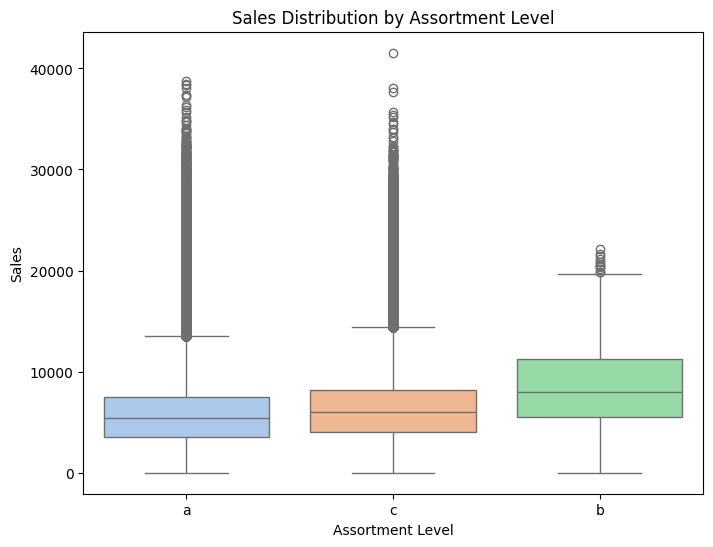

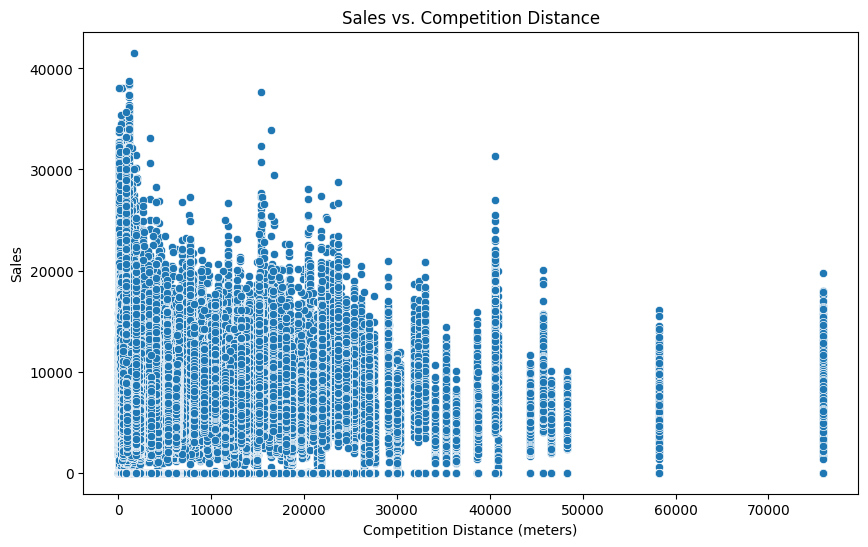

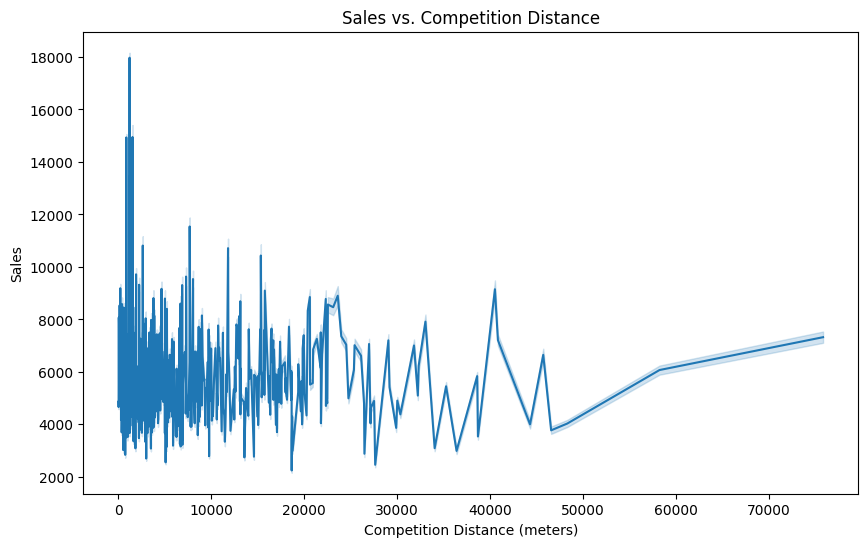

In [25]:
from data_utils import analyze_sales_by_assortment_and_competition
analyze_sales_by_assortment_and_competition(store_train_df)

## sales during holiday

Average Sales during Holidays: 5992.80
Average Sales on Non-Holiday Days: 5721.14


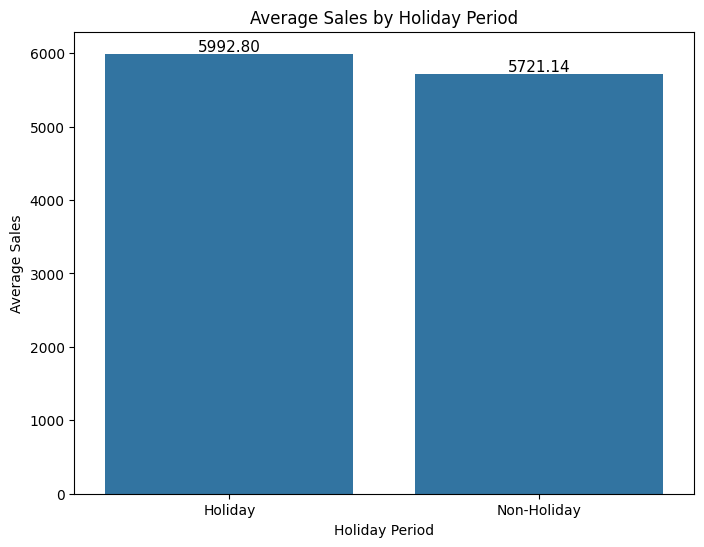

In [26]:
from data_utils import analyze_sales_by_holidays
analyze_sales_by_holidays(df)